In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helpers:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Loading Dataset

In [0]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

## Explore Dataset

In [73]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print('Number of Train Examples: {}'.format(num_train_examples))
print('Number of Test Examples: {}'.format(num_test_examples))

Number of Train Examples: 60000
Number of Test Examples: 10000


In [74]:
dataset

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [0]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [76]:
# Checking...

len(class_names)

10

In [0]:
# Normalize images:

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# Applying:

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#Putting images in cache:

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

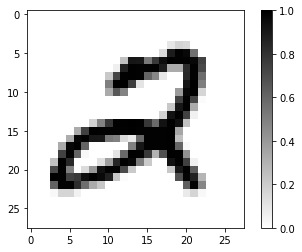

In [78]:
# Plotting a image:

for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28, 28))

# Plot!

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.show()

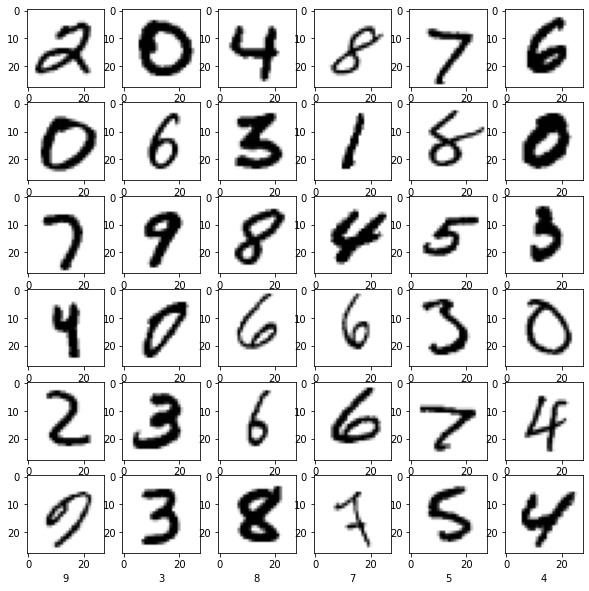

In [79]:
# Plotting first 36 images:

plt.figure(figsize=(10, 10))
i = 0

for (image, label) in test_dataset.take(36):
  image = image.numpy().reshape((28, 28))
  plt.subplot(6, 6, i+1)
  plt.xticks()
  plt.yticks()
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [80]:
image.shape

(28, 28)

## Building my Model

In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                               input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
])

In [0]:
# Compiling: 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [84]:
# Let's fit baby!

model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1185 - accuracy: 0.9639
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0392 - accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0112 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

In [90]:
evaluate = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy for Test Dataset:', evaluate)

313/313 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9906
Accuracy for Test Dataset: [0.03617502748966217, 0.9905999898910522]


In [0]:
#Applying predictions:

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [95]:
predictions[0]

array([-18.285252 , -13.15851  ,  33.245354 , -10.1755295, -11.623769 ,
       -29.973665 , -19.25839  ,  -2.7910078,  -1.086335 , -15.83261  ],
      dtype=float32)

In [96]:
predictions[0].max()

33.245354

In [0]:
# More Beatiful and Visualizable:

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

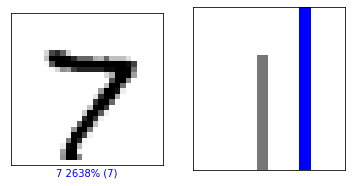

In [101]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)